# **Introduction to Linear Regression**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Regression is a frequently used problem now-a-days where we need to predict a certain value which is continous.
we know a simple Linear Regression formula that is : 

### ***Y = mX + b*** 


where, 
***m*** -> The Slope
***b*** -> intercept (or) ***bias***

now using a simple linear regression with the scalar data can be very computational quickly and it may need more computational power. 
so to avoid it we use ****vector**** Representation of the data's.
Hence the equation further reduces to the following:
> ### ***Y = X.W***

where, 
***W*** -> is the weight matrix and it has default ***bias*** in it.  


---
so a simple example of the linear regression is given below.





In [2]:
# Initializing the X (independent variable)
X = np.arange(0, 5, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

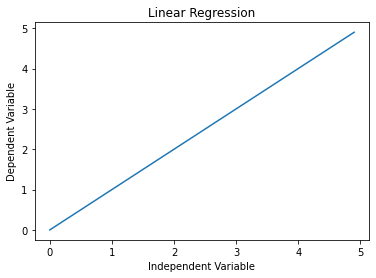

In [3]:
a = 1 # here a is our slope (assume)
b = 0 # here b is our intercept or bias (assume)

# The linear Regression equation is initialized and the output is given to the Y
Y = a * X + b 

#Simple Plot of the line.

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Linear Regression')
plt.show()

## **Using Dataset to understand Linear Regression**


So, that now we know how the linear regression works let us jump into some datasets and try to get the real world value as a prediction.

Let us create a class to represent the linear regression. 
Here, ***MyLinearRegression*** class is the initialized. 

***The initializer is nothing but the bias we need to give to the system.***


In [52]:
# Initialize the Linear Regression Class

class MyLinearRegression():

  def __init__(self, initializers = 'random'):      # CONSTRUCTOR (sets m and b values)
    if initializers == 'ones':
      self.var = 1.
    elif initializers =='zeros':
      self.var = 0.
    else:
      self.var = tf.random.uniform(shape=[], minval=0., maxval=1.)  
    
    self.m = tf.Variable(1., shape = tf.TensorShape(None))
    self.b = tf.Variable(self.var, shape= tf.TensorShape(None))
    self.cost = []
  
  # MSE (gives the loss value)
  def mse(self, true, predicted):                   
    return tf.reduce_mean(tf.square(true - predicted))
  
  # Predict (predict the values using the eq (Y = mX + b))
  def predict(self, x):                            
    return tf.reduce_sum(self.m * x, 1) + self.b

  # Update (This function learns and reduces the loss)
  def update(self, X, y, learning_rate = 0.01):
    with tf.GradientTape(persistent=True) as g:
      loss = self.mse(y, self.predict(X))
    
    print(f"Loss: {loss}")
    self.cost.append(loss)

    dy_dm = g.gradient(loss, self.m)
    dy_db = g.gradient(loss, self.b)

    self.m.assign_sub(learning_rate * dy_dm)
    self.b.assign_sub(learning_rate * dy_db)

  # Train (Finally the model is trained with X, y)
  def train(self, X, y, learning_rate = 0.01, epochs=5):
    if len(X.shape) == 1:
      X.tf.reshape(X, [X.shape[0], 1])

    self.m.assign([self.var] * X.shape[-1])

    for i in range(epochs + 1):
      print(f'Epoch: {i}')
      self.update(X, y, learning_rate=learning_rate)
    return (self.m, self.b, self.cost)

Now, we finished creating our Regression class we move on to import the dataset and do some preprocessing.


In [19]:
# Import the Fuel Consumption Dataset from the drive
df = pd.read_csv('/content/drive/My Drive/datasets/Fuel Consumption/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [22]:
df['CO2EMISSIONS'].head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

Let us predict the ***CO2EMISSIONS*** using ***ENGINESIZE***

**Independent Variable (X) => ENGINESIZE**

**Dependent Variabe (y) => CO2EMISSIONS**

In [23]:
train_x = np.asanyarray(df[['ENGINESIZE']])   
train_y = np.asanyarray(df[['CO2EMISSIONS']])
print(train_y.shape)

(1067, 1)


Let us normalize the output for better performance and also split the data to later test the performance of our model.

In [25]:
X = train_x.copy()
y = train_y.copy()

X = X / X.max()
y = y / y.max()

print(f"After normalizing\nX.max() {X.max()}\ny.max() {y.max()}")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


After normalizing
X.max() 1.0
y.max() 1.0


Let us ***Train*** the data

In [53]:
myLinearRegressor = MyLinearRegression(initializers='ones')
history = myLinearRegressor.train(X_train, y_train, learning_rate = 0.01, epochs = 200)

Epoch: 0
Loss: 0.8059194684028625
Epoch: 1
Loss: 0.7702522873878479
Epoch: 2
Loss: 0.736223042011261
Epoch: 3
Loss: 0.7037563920021057
Epoch: 4
Loss: 0.6727808117866516
Epoch: 5
Loss: 0.6432275176048279
Epoch: 6
Loss: 0.615031361579895
Epoch: 7
Loss: 0.5881298780441284
Epoch: 8
Loss: 0.562463641166687
Epoch: 9
Loss: 0.5379759073257446
Epoch: 10
Loss: 0.51461261510849
Epoch: 11
Loss: 0.4923219382762909
Epoch: 12
Loss: 0.4710547626018524
Epoch: 13
Loss: 0.450764000415802
Epoch: 14
Loss: 0.43140485882759094
Epoch: 15
Loss: 0.41293442249298096
Epoch: 16
Loss: 0.3953118920326233
Epoch: 17
Loss: 0.3784984350204468
Epoch: 18
Loss: 0.3624568581581116
Epoch: 19
Loss: 0.34715157747268677
Epoch: 20
Loss: 0.3325488269329071
Epoch: 21
Loss: 0.3186163902282715
Epoch: 22
Loss: 0.30532336235046387
Epoch: 23
Loss: 0.29264047741889954
Epoch: 24
Loss: 0.28053969144821167
Epoch: 25
Loss: 0.2689942419528961
Epoch: 26
Loss: 0.257978618144989
Epoch: 27
Loss: 0.24746842682361603
Epoch: 28
Loss: 0.237440586090

Predict the X_test values

In [54]:
m, b = history[0], history[1]
y_pred = m * X_test + b
print(y_pred.shape)
print(f"m\t{m}\nb\t{b}")

(214, 1)
m	<tf.Variable 'Variable:0' shape=<unknown> dtype=float32, numpy=array([0.6309448], dtype=float32)>
b	<tf.Variable 'Variable:0' shape=<unknown> dtype=float32, numpy=0.27567396>


Visualizing the Loss value and see how the loss value is performed on the course of number of epochs.

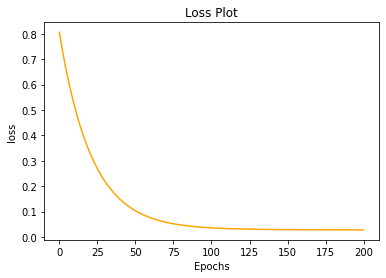

In [59]:
plt.plot(history[2], color = 'orange')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss Plot')
plt.show()

Let us Visualize the data and see how it looks for both training and test set

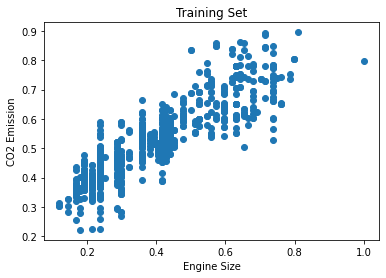

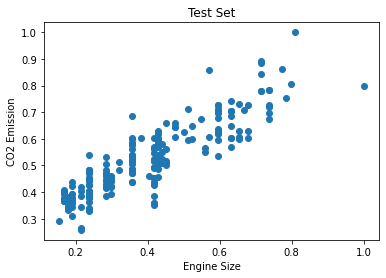

In [60]:
plt.scatter(X_train, y_train)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.title('Training Set')
plt.show()

plt.scatter(X_test, y_test)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.title('Test Set')
plt.show()

Let us Predict the line and visualize the line.

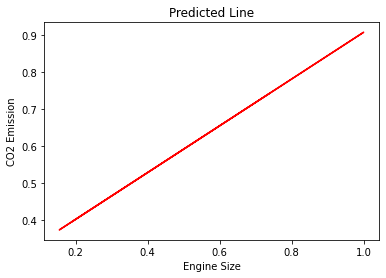

In [61]:
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.title('Predicted Line')
plt.show()

Finally, plot the graph which shows the data and predictions side by side.

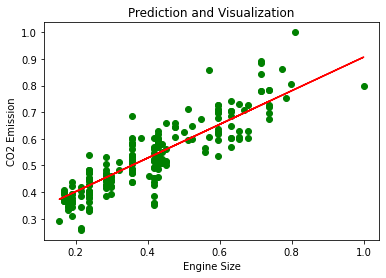

In [62]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.title('Prediction and Visualization')
plt.show()